## CMPINF 2100 Week 12 | Fitting and Assessing the performance of multiple CLASSIFICATION models

This notebook brings together EVERYTHING from week 11 and week 12!

We need programming skills covered since the BEGGINING of the semester!

### Import Modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf

We need 3 functions from SKLEARN to streamline calculating the classification performance.

In [3]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

### Read Data

Use NEW data NOT from week 11.

In [4]:
df = pd.read_csv('week_12_binary_classification.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      300 non-null    float64
 1   x2      300 non-null    float64
 2   x3      300 non-null    float64
 3   x4      300 non-null    float64
 4   x5      300 non-null    object 
 5   y       300 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 14.2+ KB


In [6]:
df.nunique()

x1    300
x2    300
x3    300
x4    300
x5      3
y       2
dtype: int64

In [7]:
df.dtypes

x1    float64
x2    float64
x3    float64
x4    float64
x5     object
y       int64
dtype: object

In [8]:
df.y.value_counts()

y
0    198
1    102
Name: count, dtype: int64

In [9]:
df.y.value_counts(normalize=True)

y
0    0.66
1    0.34
Name: proportion, dtype: float64

In [10]:
df.y.mean()

0.34

In [11]:
1 - df.y.mean()

0.6599999999999999

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


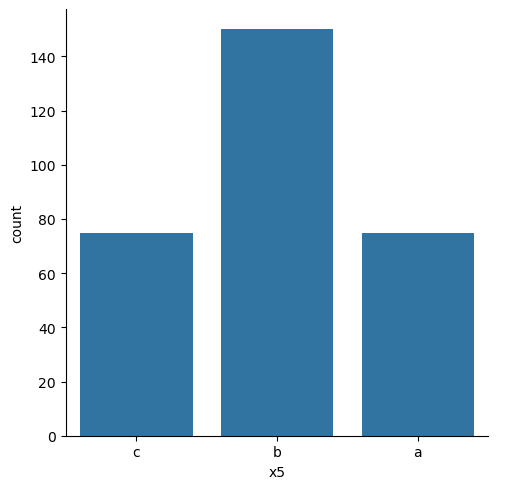

In [12]:
sns.catplot(data = df, x='x5', kind='count')

plt.show()

In [13]:
df.describe()

,x1,x2,x3,x4,y
count,300.000000,300.000000,300.000000,300.000000,300.0000
mean,-0.000849,0.000261,0.002302,0.001372,0.3400
std,0.998805,1.000864,1.004086,1.001563,0.4745
min,-2.913116,-3.008946,-2.783621,-2.864881,0.0000
25%,-0.673919,-0.671703,-0.673862,-0.673474,0.0000
50%,0.000468,-0.001799,0.001278,0.002178,0.0000
75%,0.673103,0.671835,0.674558,0.670999,1.0000
max,2.783826,3.120873,3.497789,3.128220,1.0000


### Fitting Logistic Regression Models

Let's start with the SIMPLEST possible logistic regression model!

The event probability is a constant and DOES NOT depend on any inputs!

In [14]:
mod_aa = smf.logit(formula='y ~ 1', data=df).fit()

Optimization terminated successfully.
         Current function value: 0.641035
         Iterations 4


In [15]:
mod_aa.params

Intercept   -0.663294
dtype: float64

Fit a model with LINEAR ADDITIVE FEATURES which includes continuous and categorical inputs!

In [17]:
mod_bb = smf.logit(formula='y ~ x1 + x2 + x3 + x4 + x5', data=df).fit()

Optimization terminated successfully.
         Current function value: 0.588229
         Iterations 5


In [18]:
mod_bb.params

Intercept   -0.674470
x5[T.b]     -0.289844
x5[T.c]      0.310042
x1           0.310394
x2          -0.579591
x3           0.113856
x4          -0.048754
dtype: float64

In [19]:
mod_bb.pvalues < 0.05

Intercept     True
x5[T.b]      False
x5[T.c]      False
x1            True
x2            True
x3           False
x4           False
dtype: bool

But, logistic regression models can use NON-LINEAR FEATURES derrived from the inputs **AND** INTERACTIONS between inputs!

In [22]:
mod_cc = smf.logit(formula='y ~ x5 * (x1+ x2 + x3 + x4) + np.power(x1, 2) + np.power(x2, 2) + np.power(x3, 2) + np.power(x4, 2)',
                   data=df).fit()

Optimization terminated successfully.
         Current function value: 0.489643
         Iterations 7


In [23]:
mod_cc.params

Intercept          0.476079
x5[T.b]           -0.503065
x5[T.c]            0.166176
x1                 0.462254
x5[T.b]:x1        -0.080122
x5[T.c]:x1         0.423130
x2                -1.326700
x5[T.b]:x2         0.505468
x5[T.c]:x2         0.192249
x3                -0.087513
x5[T.b]:x3         0.651306
x5[T.c]:x3        -0.066232
x4                -0.156396
x5[T.b]:x4         0.075847
x5[T.c]:x4         0.283769
np.power(x1, 2)   -0.746746
np.power(x2, 2)   -0.635702
np.power(x3, 2)   -0.180378
np.power(x4, 2)    0.155571
dtype: float64

In [24]:
mod_cc.pvalues < 0.05

Intercept          False
x5[T.b]            False
x5[T.c]            False
x1                 False
x5[T.b]:x1         False
x5[T.c]:x1         False
x2                  True
x5[T.b]:x2         False
x5[T.c]:x2         False
x3                 False
x5[T.b]:x3         False
x5[T.c]:x3         False
x4                 False
x5[T.b]:x4         False
x5[T.c]:x4         False
np.power(x1, 2)     True
np.power(x2, 2)     True
np.power(x3, 2)    False
np.power(x4, 2)    False
dtype: bool

Let's now define a function that allows us to FIT and CALCULATE the training set performance for ANY FORMULA!

In [25]:
def fit_and_access_logistic(mod_name, a_formula, train_data, threshold):
    a_mod = smf.logit(formula=a_formula, data=train_data).fit()

    train_copy = train_data.copy()

    train_copy['pred_probability'] = a_mod.predict( train_data )

    train_copy['pred_class'] = np.where( train_copy.pred_probability > threshold, 1, 0 )

    TN, FP, FN, TP = confusion_matrix( train_copy.y.to_numpy(), train_copy.pred_class.to_numpy() ).ravel()

    Accuracy = (TN + TP) / (TN + FP + FN + TP)

    Sensitivity = (TP) / (TP + FN)

    Specificity = (TN) / (TN + FP)

    FPR = 1 - Specificity

    ROC_AUC = roc_auc_score( train_copy.y.to_numpy(), train_copy.pred_probability.to_numpy() )

    res_dict = {'model_name': mod_name,
                'model_formula': a_formula,
                'num_coefs': len( a_mod.params ),
                'threshold': threshold,
                'Accuracy': Accuracy,
                'Sensitivity': Sensitivity,
                'Specificity': Specificity,
                'FPR': FPR,
                'ROC_AUC': ROC_AUC}

    return pd.DataFrame( res_dict, index=[0] )
    

In [26]:
fit_and_access_logistic(0, 'y ~ 1', train_data=df, threshold=0.5)

Optimization terminated successfully.
         Current function value: 0.641035
         Iterations 4


,model_name,model_formula,num_coefs,threshold,Accuracy,Sensitivity,Specificity,FPR,ROC_AUC
0,0,y ~ 1,1,0.5,0.66,0.0,1.0,0.0,0.5


Let's define a VERY BIG list of DIFFERENT formulas!

In [27]:
formula_list = ['y ~ 1', 
                'y ~ x5',
                'y ~ x1 + x2 + x3 + x4',
                'y ~ x1 + x2 + x3 + x4 + x5',
                'y ~ x5 * (x1 + x2 + x3 + x4)',
                'y ~ (x1 + x2 + x3 + x4) ** 2',
                'y ~ x1 + x2 + x3 + x4 + np.power(x1, 2) + np.power(x2, 2) + np.power(x3, 2) + np.power(x4, 2)',
                'y ~ x5 + x1 + x2 + x3 + x4 + np.power(x1, 2) + np.power(x2, 2) + np.power(x3, 2) + np.power(x4, 2)',
                'y ~ x5 * (x1 + x2 + x3 + x4 + np.power(x1, 2) + np.power(x2, 2) + np.power(x3, 2) + np.power(x4, 2))',
                'y ~ x5 + ((x1 + x2 + x3 + x4)**2 + np.power(x1, 2) + np.power(x2, 2) + np.power(x3, 2) + np.power(x4, 2))',
                'y ~ x5 * ((x1 + x2 + x3 + x4)**2 + np.power(x1, 2) + np.power(x2, 2) + np.power(x3, 2) + np.power(x4, 2))',
                'y ~ x5 + (x1 + x2 + x3 + x4)**3',
                'y ~x5 + (x1 + x2 + x3 + x4)**4',
                'y ~ (x1 + x2 + x3 + x4 + x5)**3',
                'y ~ (x1 + x2 + x3 + x4 + x5)**4',
                'y ~ x5 * (( x1 + x2 + x3 + x4)**3 + np.power(x1, 2) + np.power(x2, 2) + np.power(x3, 2) + np.power(x4, 2) + np.power(x1, 3) + np.power(x2, 3) + np.power(x3, 3) + np.power(x4, 3) )',
                'y ~ x5 * (( x1 + x2 + x3 + x4)**3 + np.power(x1, 2) + np.power(x2, 2) + np.power(x3, 2) + np.power(x4, 2) + np.power(x1, 3) + np.power(x2, 3) + np.power(x3, 3) + np.power(x4, 3) + np.power(x1, 4) + np.power(x2, 4) + np.power(x3, 4) + np.power(x4, 4) )'
               ]
                

In [28]:
formula_list[0]

'y ~ 1'

In [30]:
formula_list[1]

'y ~ x5'

In [31]:
formula_list[2]

'y ~ x1 + x2 + x3 + x4'

In [32]:
formula_list[3]

'y ~ x1 + x2 + x3 + x4 + x5'

Use a for-loop to ITERATE over ALL formulas!

In [34]:
results_list = []

for m in range(len(formula_list)):
    results_list.append( fit_and_access_logistic(m, formula_list[m], train_data=df, threshold=0.5) )

Optimization terminated successfully.
         Current function value: 0.641035
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.634259
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.594506
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.588229
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.569593
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.587858
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.513238
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.503664
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.481047
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.499744
  

In [35]:
len( results_list )

17

In [36]:
len( formula_list )

17

In [37]:
results_list[0]

,model_name,model_formula,num_coefs,threshold,Accuracy,Sensitivity,Specificity,FPR,ROC_AUC
0,0,y ~ 1,1,0.5,0.66,0.0,1.0,0.0,0.5


In [38]:
results_list[1]

,model_name,model_formula,num_coefs,threshold,Accuracy,Sensitivity,Specificity,FPR,ROC_AUC
0,1,y ~ x5,3,0.5,0.66,0.0,1.0,0.0,0.564988


Combine all results into a single DataFrame.

In [40]:
results_df = pd.concat( results_list, ignore_index=True )

In [41]:
results_df

,model_name,model_formula,num_coefs,threshold,Accuracy,Sensitivity,Specificity,FPR,ROC_AUC
0,0,y ~ 1,1,0.5,0.660000,0.000000,1.000000,0.000000,0.500000
1,1,y ~ x5,3,0.5,0.660000,0.000000,1.000000,0.000000,0.564988
2,2,y ~ x1 + x2 + x3 + x4,5,0.5,0.626667,0.205882,0.843434,0.156566,0.693207
3,3,y ~ x1 + x2 + x3 + x4 + x5,7,0.5,0.660000,0.264706,0.863636,0.136364,0.700980
4,4,y ~ x5 * (x1 + x2 + x3 + x4),15,0.5,0.693333,0.274510,0.909091,0.090909,0.731779
5,5,y ~ (x1 + x2 + x3 + x4) ** 2,11,0.5,0.653333,0.245098,0.863636,0.136364,0.700634
6,6,"y ~ x1 + x2 + x3 + x4 + np.power(x1, 2) + np.p...",9,0.5,0.740000,0.588235,0.818182,0.181818,0.788622
7,7,"y ~ x5 + x1 + x2 + x3 + x4 + np.power(x1, 2) +...",11,0.5,0.723333,0.500000,0.838384,0.161616,0.800158
8,8,"y ~ x5 * (x1 + x2 + x3 + x4 + np.power(x1, 2) ...",27,0.5,0.766667,0.558824,0.873737,0.126263,0.822787
9,9,y ~ x5 + ((x1 + x2 + x3 + x4)**2 + np.power(x1...,17,0.5,0.733333,0.519608,0.843434,0.156566,0.801347


Which model is the BEST according to the TRAINING DATA?

In [42]:
results_df.sort_values(by=['Accuracy'], ascending=False)

,model_name,model_formula,num_coefs,threshold,Accuracy,Sensitivity,Specificity,FPR,ROC_AUC
16,16,y ~ x5 * (( x1 + x2 + x3 + x4)**3 + np.power(x...,81,0.5,0.813333,0.715686,0.863636,0.136364,0.916815
15,15,y ~ x5 * (( x1 + x2 + x3 + x4)**3 + np.power(x...,69,0.5,0.806667,0.686275,0.868687,0.131313,0.888146
8,8,"y ~ x5 * (x1 + x2 + x3 + x4 + np.power(x1, 2) ...",27,0.5,0.766667,0.558824,0.873737,0.126263,0.822787
10,10,y ~ x5 * ((x1 + x2 + x3 + x4)**2 + np.power(x1...,45,0.5,0.760000,0.588235,0.848485,0.151515,0.851951
6,6,"y ~ x1 + x2 + x3 + x4 + np.power(x1, 2) + np.p...",9,0.5,0.740000,0.588235,0.818182,0.181818,0.788622
14,14,y ~ (x1 + x2 + x3 + x4 + x5)**4,46,0.5,0.736667,0.421569,0.898990,0.101010,0.794959
9,9,y ~ x5 + ((x1 + x2 + x3 + x4)**2 + np.power(x1...,17,0.5,0.733333,0.519608,0.843434,0.156566,0.801347
13,13,y ~ (x1 + x2 + x3 + x4 + x5)**3,37,0.5,0.726667,0.382353,0.904040,0.095960,0.763171
7,7,"y ~ x5 + x1 + x2 + x3 + x4 + np.power(x1, 2) +...",11,0.5,0.723333,0.500000,0.838384,0.161616,0.800158
12,12,y ~x5 + (x1 + x2 + x3 + x4)**4,18,0.5,0.700000,0.343137,0.883838,0.116162,0.724896


In [43]:
results_df.sort_values(by=['ROC_AUC'], ascending=False)

,model_name,model_formula,num_coefs,threshold,Accuracy,Sensitivity,Specificity,FPR,ROC_AUC
16,16,y ~ x5 * (( x1 + x2 + x3 + x4)**3 + np.power(x...,81,0.5,0.813333,0.715686,0.863636,0.136364,0.916815
15,15,y ~ x5 * (( x1 + x2 + x3 + x4)**3 + np.power(x...,69,0.5,0.806667,0.686275,0.868687,0.131313,0.888146
10,10,y ~ x5 * ((x1 + x2 + x3 + x4)**2 + np.power(x1...,45,0.5,0.760000,0.588235,0.848485,0.151515,0.851951
8,8,"y ~ x5 * (x1 + x2 + x3 + x4 + np.power(x1, 2) ...",27,0.5,0.766667,0.558824,0.873737,0.126263,0.822787
9,9,y ~ x5 + ((x1 + x2 + x3 + x4)**2 + np.power(x1...,17,0.5,0.733333,0.519608,0.843434,0.156566,0.801347
7,7,"y ~ x5 + x1 + x2 + x3 + x4 + np.power(x1, 2) +...",11,0.5,0.723333,0.500000,0.838384,0.161616,0.800158
14,14,y ~ (x1 + x2 + x3 + x4 + x5)**4,46,0.5,0.736667,0.421569,0.898990,0.101010,0.794959
6,6,"y ~ x1 + x2 + x3 + x4 + np.power(x1, 2) + np.p...",9,0.5,0.740000,0.588235,0.818182,0.181818,0.788622
13,13,y ~ (x1 + x2 + x3 + x4 + x5)**3,37,0.5,0.726667,0.382353,0.904040,0.095960,0.763171
4,4,y ~ x5 * (x1 + x2 + x3 + x4),15,0.5,0.693333,0.274510,0.909091,0.090909,0.731779


The TRAINING SET performance is getting BETTER as the NUMBER of COEFFICIENTS INCREASES!

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


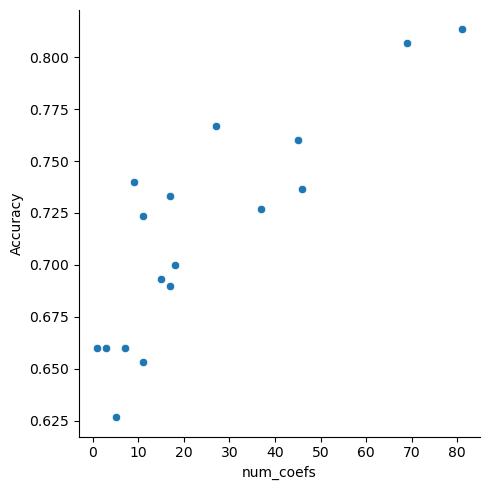

In [44]:
sns.relplot( data= results_df, x='num_coefs', y='Accuracy', kind='scatter')

plt.show()

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


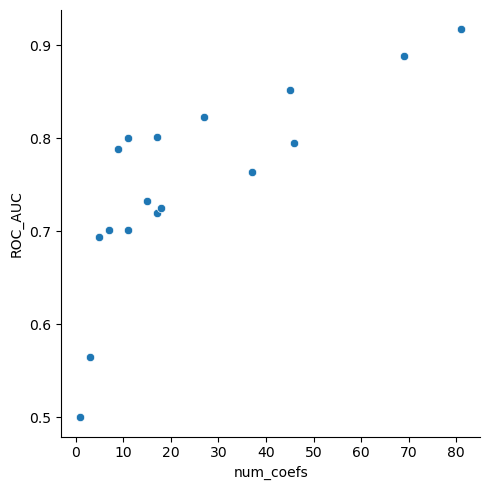

In [45]:
sns.relplot( data= results_df, x='num_coefs', y='ROC_AUC', kind='scatter')

plt.show()

We need to estimate MORE coefficients when we ADD or INCLUDE more FEATURES in the model!

Our most COMPLEX model has features coming from POLYNOMIALS **AND** INTERACTIONS!

Let's visualize the entire ROC curve for each model. This way, we can confirm that the ROC AUC metric is ALSO identifying the MOST COMPLEX model as the best.

We need another function that returns the complete ROC curve for each model.

In [46]:
def fit_logistic_make_roc(mod_name, a_formula, train_data):
    a_mod = smf.logit(formula=a_formula, data=train_data).fit()

    train_copy = train_data.copy()

    train_copy['pred_probability'] = a_mod.predict( train_data )

    fpr, tpr, threshold = roc_curve( train_data.y.to_numpy(), train_copy.pred_probability.to_numpy() )

    res_df = pd.DataFrame({'tpr': tpr,
                           'fpr': fpr,
                           'threshold': threshold})

    res_df['model_name'] = mod_name
    res_df['model_formula'] = a_formula

    return res_df

In [47]:
roc_list = []

for m in range( len(formula_list) ):
    roc_list.append( fit_logistic_make_roc( m, formula_list[m], train_data=df))

Optimization terminated successfully.
         Current function value: 0.641035
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.634259
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.594506
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.588229
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.569593
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.587858
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.513238
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.503664
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.481047
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.499744
  

In [48]:
roc_df = pd.concat( roc_list, ignore_index=True)

In [49]:
roc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1594 entries, 0 to 1593
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tpr            1594 non-null   float64
 1   fpr            1594 non-null   float64
 2   threshold      1594 non-null   float64
 3   model_name     1594 non-null   int64  
 4   model_formula  1594 non-null   object 
dtypes: float64(3), int64(1), object(1)
memory usage: 62.4+ KB


In [50]:
roc_df

,tpr,fpr,threshold,model_name,model_formula
0,0.000000,0.000000,inf,0,y ~ 1
1,1.000000,1.000000,3.400000e-01,0,y ~ 1
2,0.000000,0.000000,inf,1,y ~ x5
3,0.303922,0.222222,4.133333e-01,1,y ~ x5
4,0.578431,0.459596,3.733333e-01,1,y ~ x5
...,...,...,...,...,...
1589,0.980392,0.313131,1.788519e-01,16,y ~ x5 * (( x1 + x2 + x3 + x4)**3 + np.power(x...
1590,0.990196,0.313131,1.656527e-01,16,y ~ x5 * (( x1 + x2 + x3 + x4)**3 + np.power(x...
1591,0.990196,0.363636,1.365934e-01,16,y ~ x5 * (( x1 + x2 + x3 + x4)**3 + np.power(x...
1592,1.000000,0.363636,1.285808e-01,16,y ~ x5 * (( x1 + x2 + x3 + x4)**3 + np.power(x...


Let's visualize the ROC curve for each model as a LINE CHART in Seaborn.

In [51]:
roc_df['model_name'] = roc_df.model_name.astype('category')

In [52]:
roc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1594 entries, 0 to 1593
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   tpr            1594 non-null   float64 
 1   fpr            1594 non-null   float64 
 2   threshold      1594 non-null   float64 
 3   model_name     1594 non-null   category
 4   model_formula  1594 non-null   object  
dtypes: category(1), float64(3), object(1)
memory usage: 52.2+ KB


C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


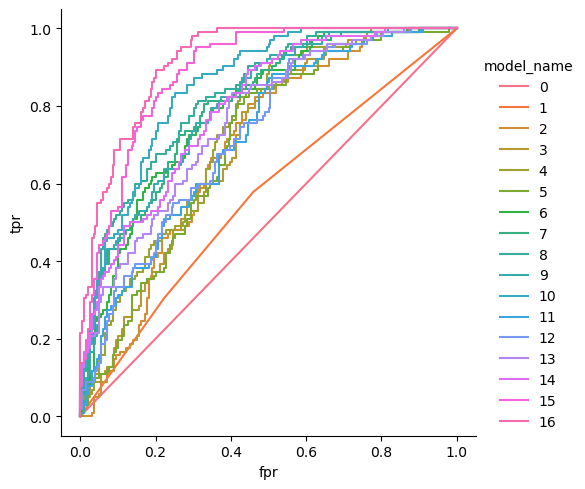

In [53]:
sns.relplot(data=roc_df, x='fpr', y='tpr', hue='model_name',
            kind='line', estimator=None, units='model_name')

plt.show()

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


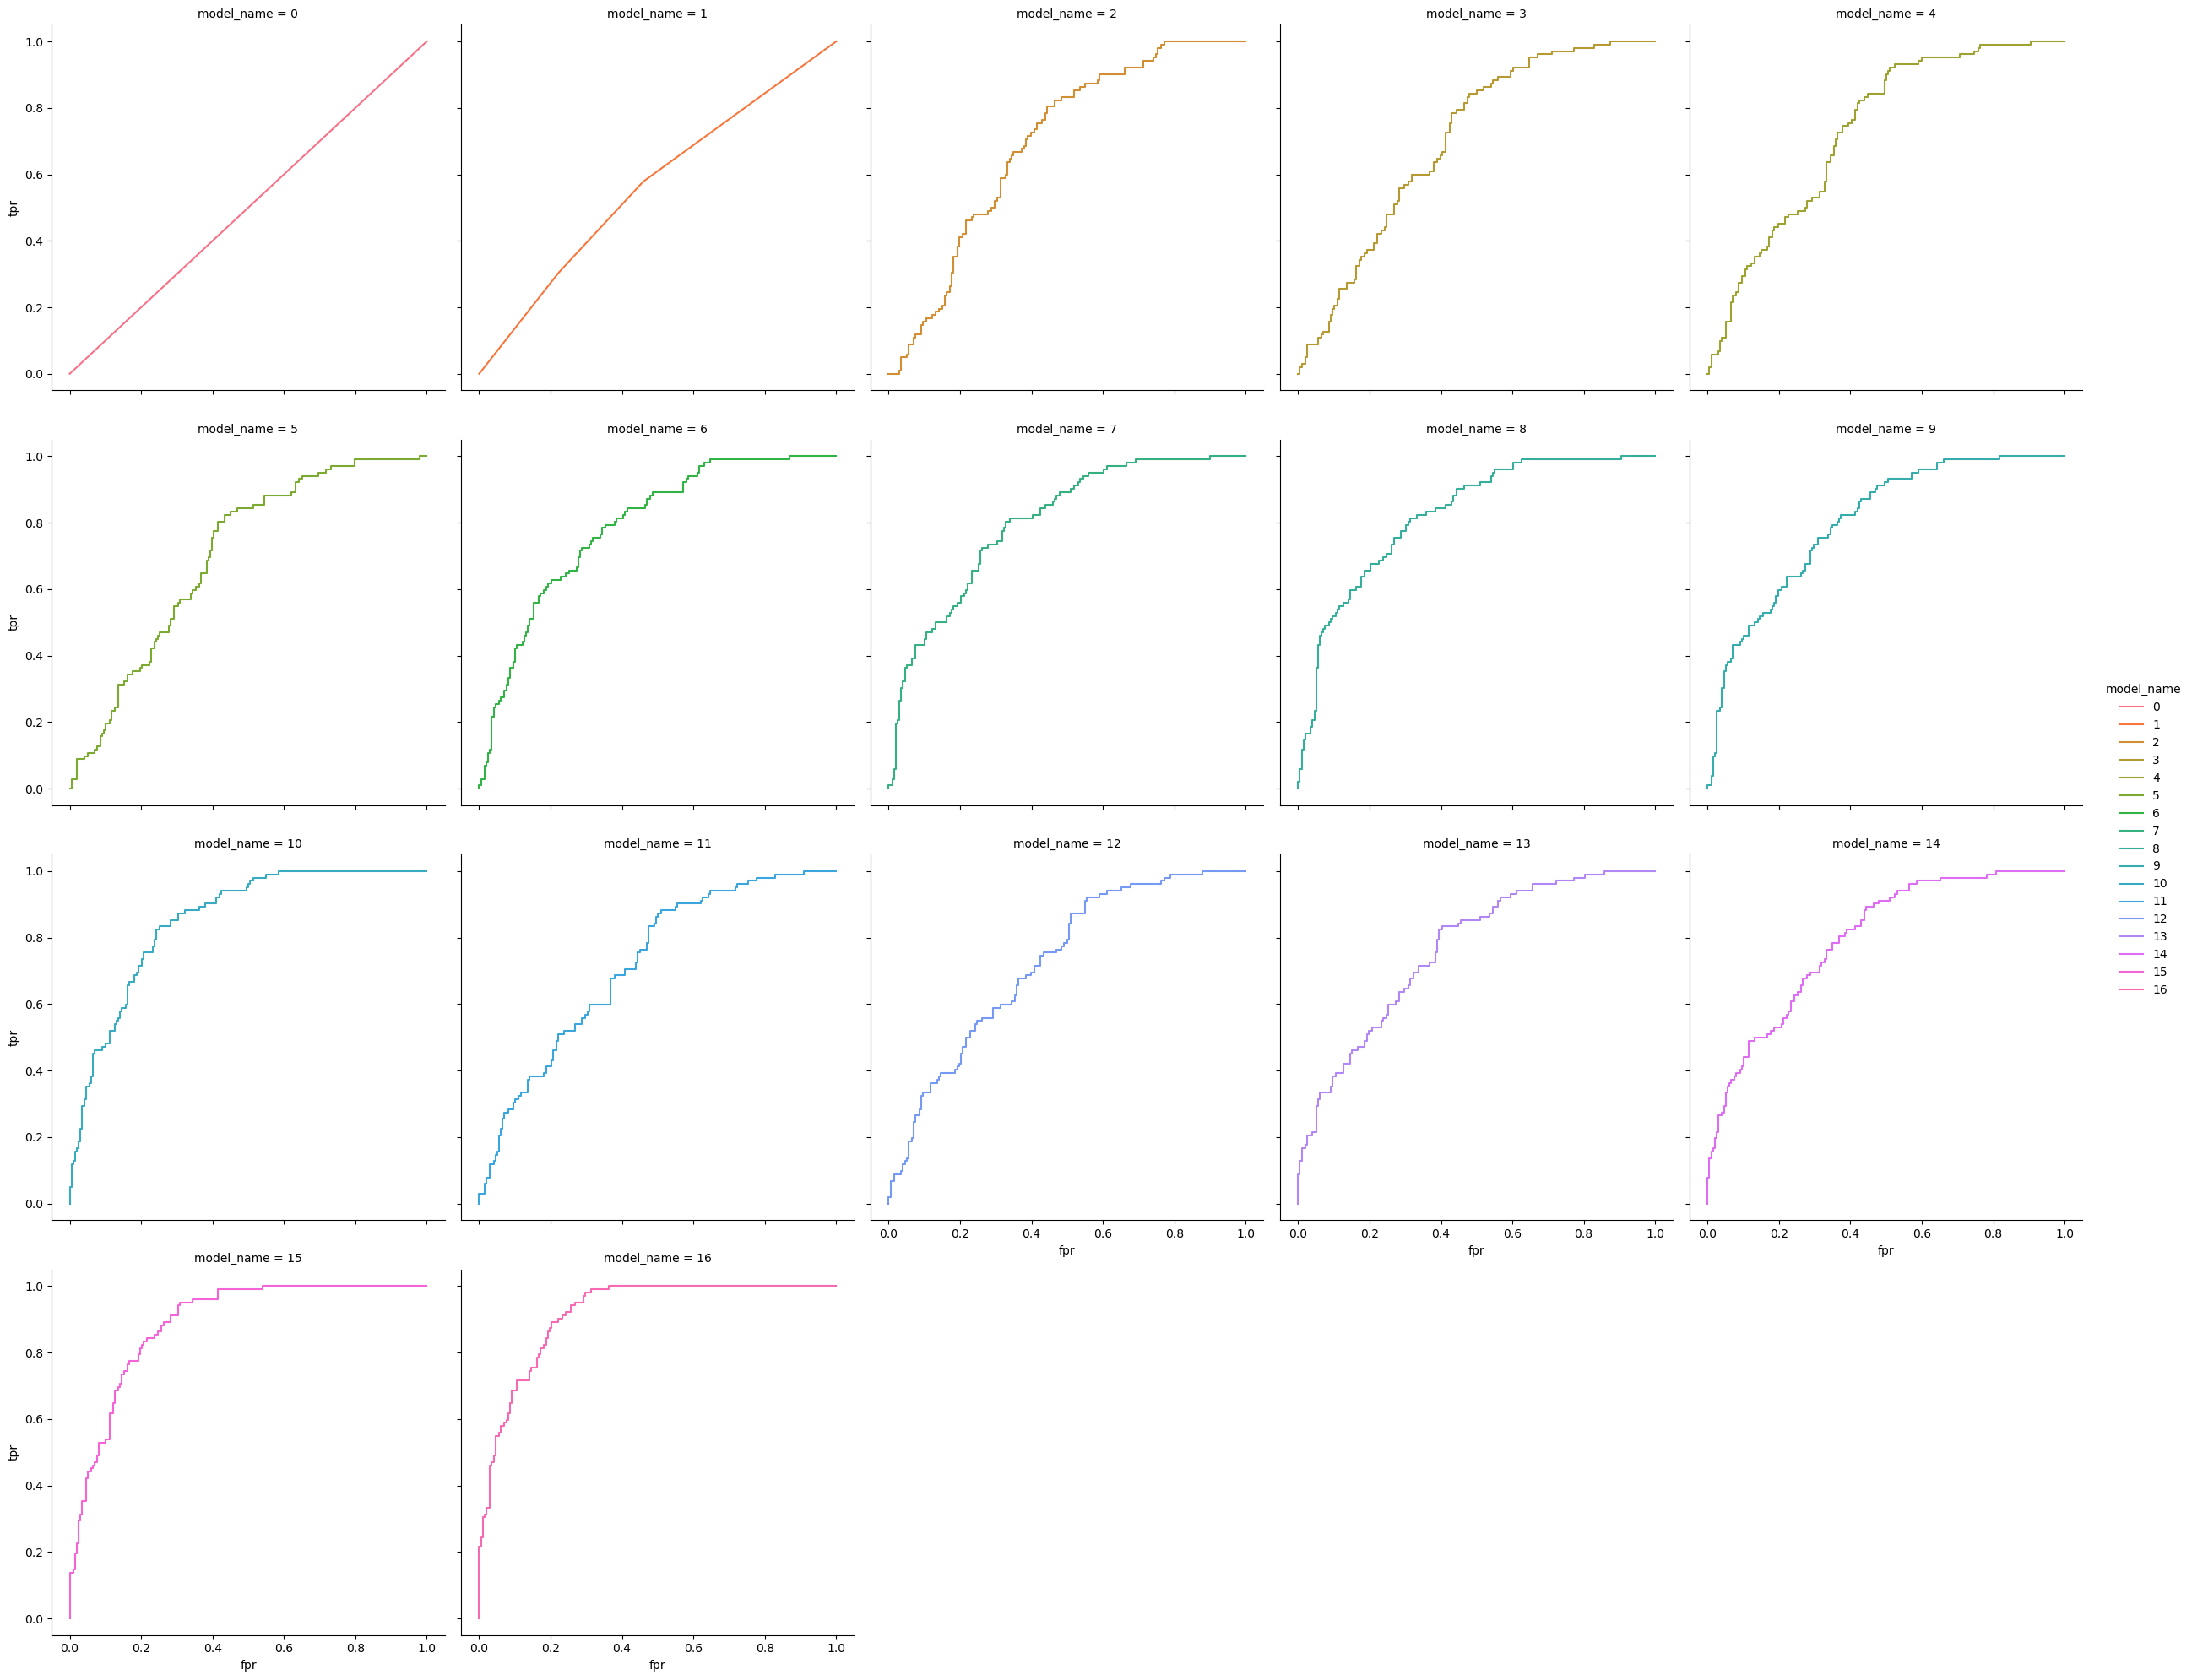

In [54]:
sns.relplot( data=roc_df, x='fpr', y='tpr', hue='model_name',
            kind='line', estimator=None, units='model_name',
            col='model_name', col_wrap=5)

plt.show()

### Performance Summary

According to the TRAINING SET, the data used to FIT the models, the MODEL with the MOST NUMBER OF UNKNOWN COEFFICIENTS or SLOPES to estimate is the BEST!

### Predictions

Let's make a PREDICTION GRID to allow VISUALIZING the PREDICTED EVENT PROBABILITY for different INPUT COMBINATIONS. 

Let's just focus on the relationship between the EVENT PROBABILITY and `x1` for different values of `x2` and categorical input.

In [55]:
df

,x1,x2,x3,x4,x5,y
0,1.077412,-0.991094,0.208610,-1.019744,c,1
1,-0.637747,-0.307506,-1.794250,1.189993,b,0
2,1.345143,-1.075281,1.685044,0.167879,b,0
3,1.659924,0.735156,-0.210541,-2.534105,b,1
4,1.182378,1.599140,-0.301995,1.206648,b,0
...,...,...,...,...,...,...
295,1.239739,1.572756,0.610548,1.402896,c,0
296,-0.528292,3.120873,0.357688,-0.599724,c,0
297,0.256334,1.293508,0.023925,-0.996928,b,0
298,-0.628451,0.373513,0.038140,2.197234,b,1


In [57]:
input_grid = pd.DataFrame([ (x1, x2, x3, x4, x5) for x1 in np.linspace(df.x1.min(), df.x1.max(), num=101)
                                                 for x2 in np.linspace(df.x2.min(), df.x2.max(), num=9)
                                                 for x3 in [df.x3.mean()]
                                                 for x4 in [df.x3.mean()]
                                                 for x5 in df.x5.unique()],
                          columns=['x1', 'x2', 'x3', 'x4', 'x5'])

In [58]:
input_grid.shape

(2727, 5)

In [59]:
input_grid.nunique()

x1    101
x2      9
x3      1
x4      1
x5      3
dtype: int64

In [60]:
input_grid.x5.value_counts()

x5
c    909
b    909
a    909
Name: count, dtype: int64

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


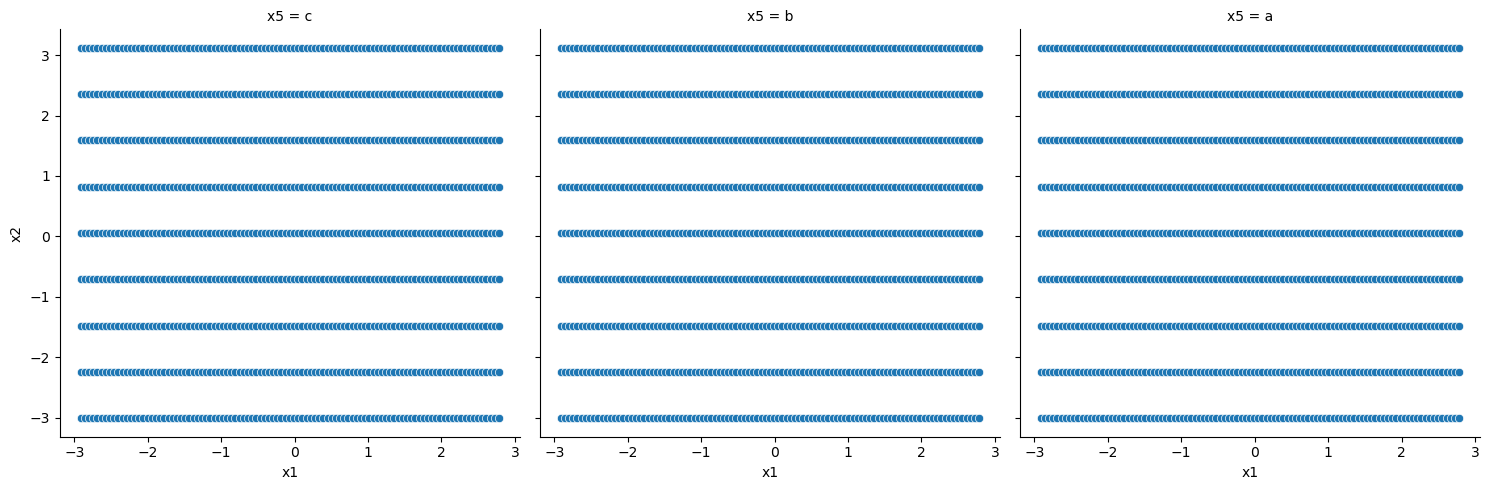

In [62]:
sns.relplot(data=input_grid, x='x1', y='x2', col='x5')

plt.show()

Reemember, we fit a few models earlier

In [63]:
mod_bb.params

Intercept   -0.674470
x5[T.b]     -0.289844
x5[T.c]      0.310042
x1           0.310394
x2          -0.579591
x3           0.113856
x4          -0.048754
dtype: float64

In [64]:
dfviz = input_grid.copy()

In [65]:
dfviz['pred_probability_bb'] = mod_bb.predict( input_grid )

In [66]:
dfviz

,x1,x2,x3,x4,x5,pred_probability_bb
0,-2.913116,-3.008946,0.002302,0.002302,c,0.616677
1,-2.913116,-3.008946,0.002302,0.002302,b,0.468935
2,-2.913116,-3.008946,0.002302,0.002302,a,0.541262
3,-2.913116,-2.242719,0.002302,0.002302,c,0.507842
4,-2.913116,-2.242719,0.002302,0.002302,b,0.361579
...,...,...,...,...,...,...
2722,2.783826,2.354646,0.002302,0.002302,b,0.187732
2723,2.783826,2.354646,0.002302,0.002302,a,0.235958
2724,2.783826,3.120873,0.002302,0.002302,c,0.212650
2725,2.783826,3.120873,0.002302,0.002302,b,0.129103


C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<function matplotlib.pyplot.show(close=None, block=None)>

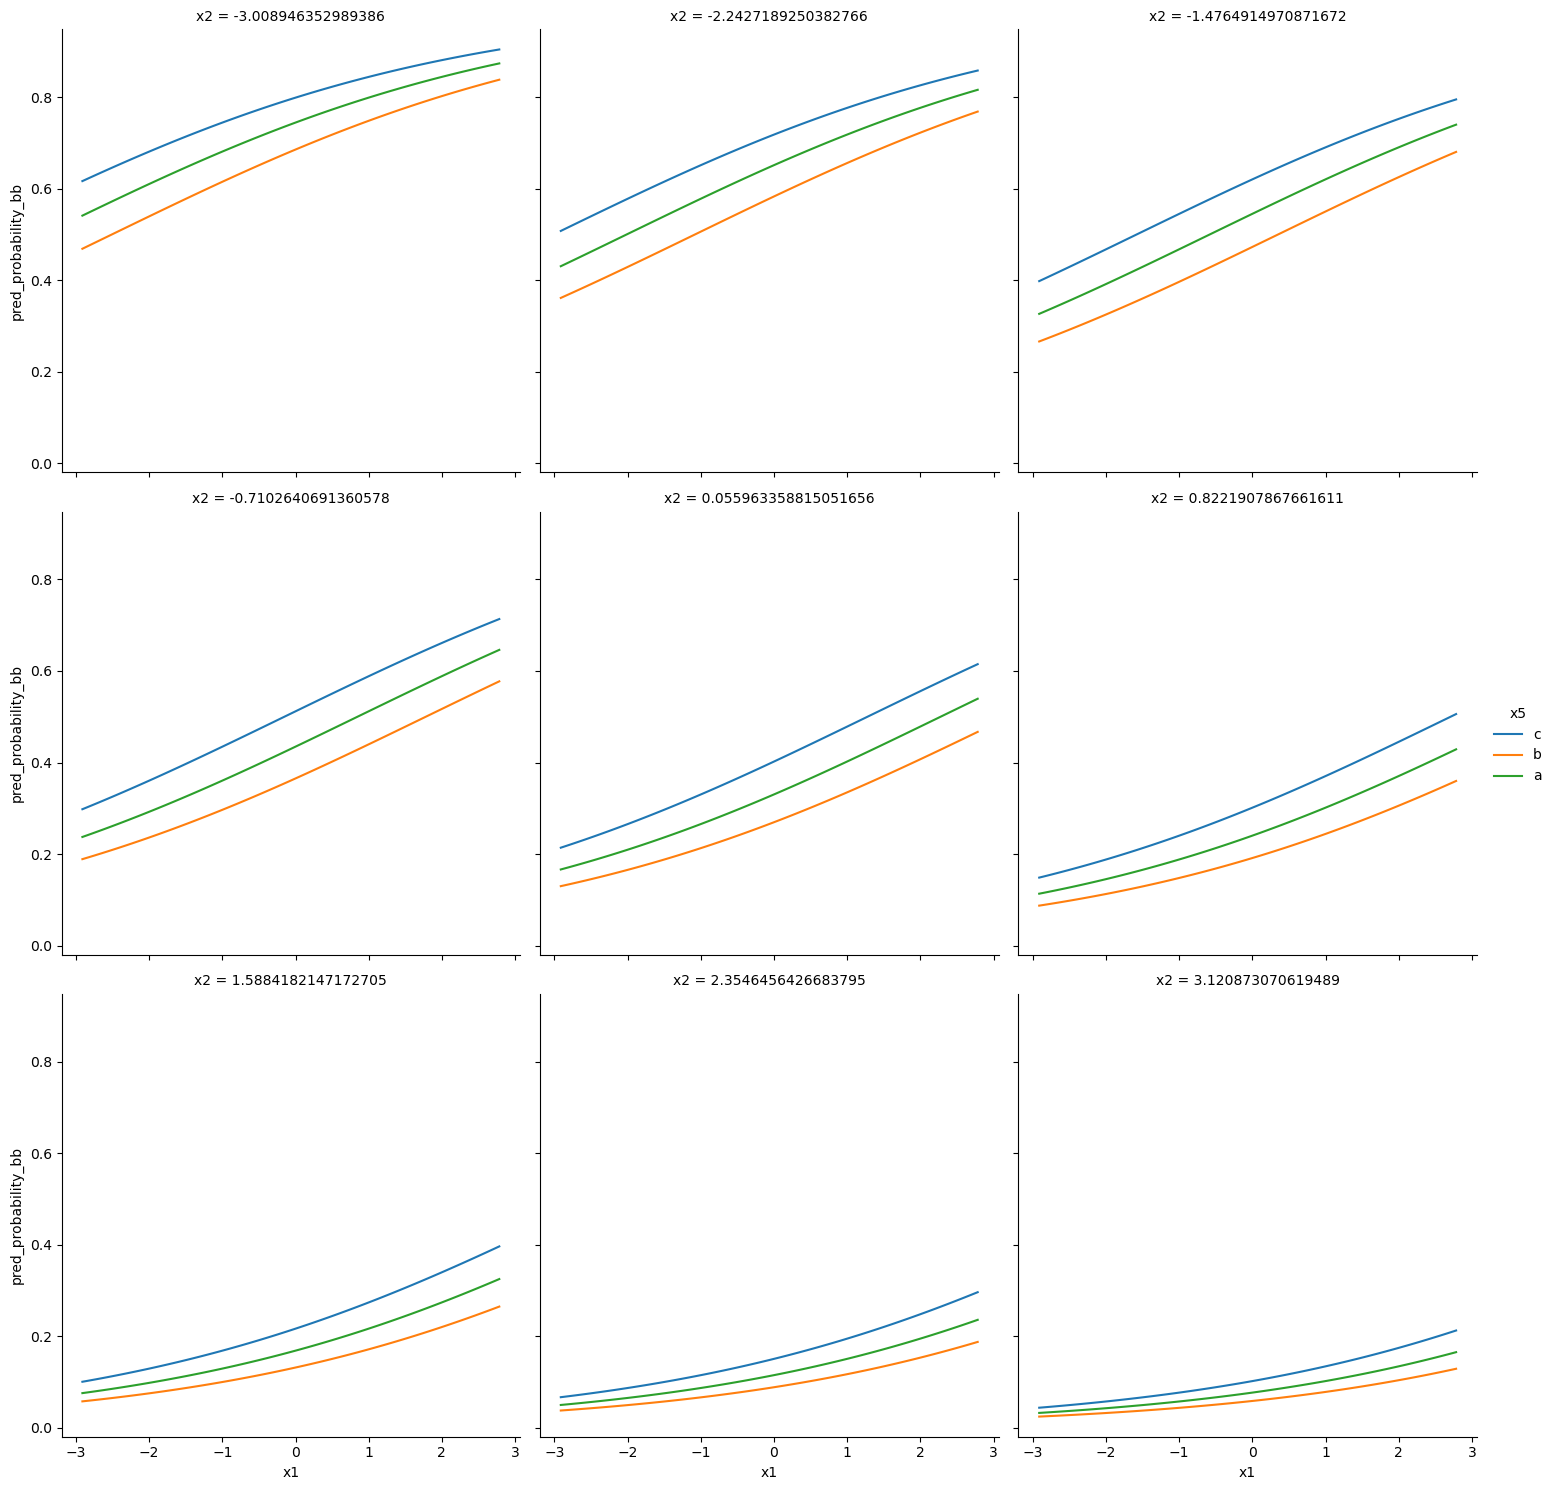

In [67]:
sns.relplot( data=dfviz, x='x1', y='pred_probability_bb', hue='x5', col='x2',
           kind='line', estimator=None, units='x5',
           col_wrap=3)

plt.show

In [69]:
mod_bb.params

Intercept   -0.674470
x5[T.b]     -0.289844
x5[T.c]      0.310042
x1           0.310394
x2          -0.579591
x3           0.113856
x4          -0.048754
dtype: float64

In [70]:
mod_bb.pvalues < 0.05

Intercept     True
x5[T.b]      False
x5[T.c]      False
x1            True
x2            True
x3           False
x4           False
dtype: bool

In [71]:
formula_list[len(formula_list)-1]

'y ~ x5 * (( x1 + x2 + x3 + x4)**3 + np.power(x1, 2) + np.power(x2, 2) + np.power(x3, 2) + np.power(x4, 2) + np.power(x1, 3) + np.power(x2, 3) + np.power(x3, 3) + np.power(x4, 3) + np.power(x1, 4) + np.power(x2, 4) + np.power(x3, 4) + np.power(x4, 4) )'

In [72]:
mod_complex = smf.logit(formula=formula_list[len(formula_list)-1], data=df).fit()

Optimization terminated successfully.
         Current function value: 0.335107
         Iterations 12


In [73]:
mod_complex.params

Intercept                  1.320581
x5[T.b]                   -1.552826
x5[T.c]                   -0.022902
x1                        -0.998869
x5[T.b]:x1                 1.210213
                             ...   
x5[T.b]:np.power(x3, 4)    0.416084
x5[T.c]:np.power(x3, 4)    0.224892
np.power(x4, 4)            0.284632
x5[T.b]:np.power(x4, 4)   -0.394857
x5[T.c]:np.power(x4, 4)   -1.348794
Length: 81, dtype: float64

In [74]:
mod_complex.params.to_numpy()

array([ 1.32058095, -1.55282638, -0.02290171, -0.9988693 ,  1.2102127 ,
        4.66947597,  1.90020218, -2.80989522,  0.01302911,  2.48168371,
       -0.96904051, -3.70302173, -2.00940075,  2.05631202, -1.42985181,
       -1.96785309,  3.25014955, -2.70804585, -0.58525923,  0.05788615,
        2.25275043,  0.89524115, -1.68284148,  1.52848922, -1.14562035,
        2.31962476,  3.7961458 , -0.50683116,  0.46859127,  1.42882239,
        1.31683802, -1.20552019,  1.06433771, -0.34984964,  0.29108868,
       -5.68198569,  0.73811828, -0.97567907, -5.31258558,  0.51251628,
       -0.23690389, -1.06781236, -0.88103307,  0.95685953, -1.40207326,
        0.78548406,  0.32390322, -6.11743806, -0.39173843, -1.41806941,
        1.74981065, -2.08533623, -0.07217375, -0.85639912, -1.18932018,
        1.95855023,  7.7673739 ,  1.54691021, -0.69605481, -1.9847706 ,
       -4.90112106,  3.96307639,  3.21648377, -0.60610656,  0.63119099,
        0.994993  ,  0.4187507 , -0.44076032,  1.67639326, -1.16

In [75]:
dfviz['pred_probability_complex'] = mod_complex.predict( input_grid )

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


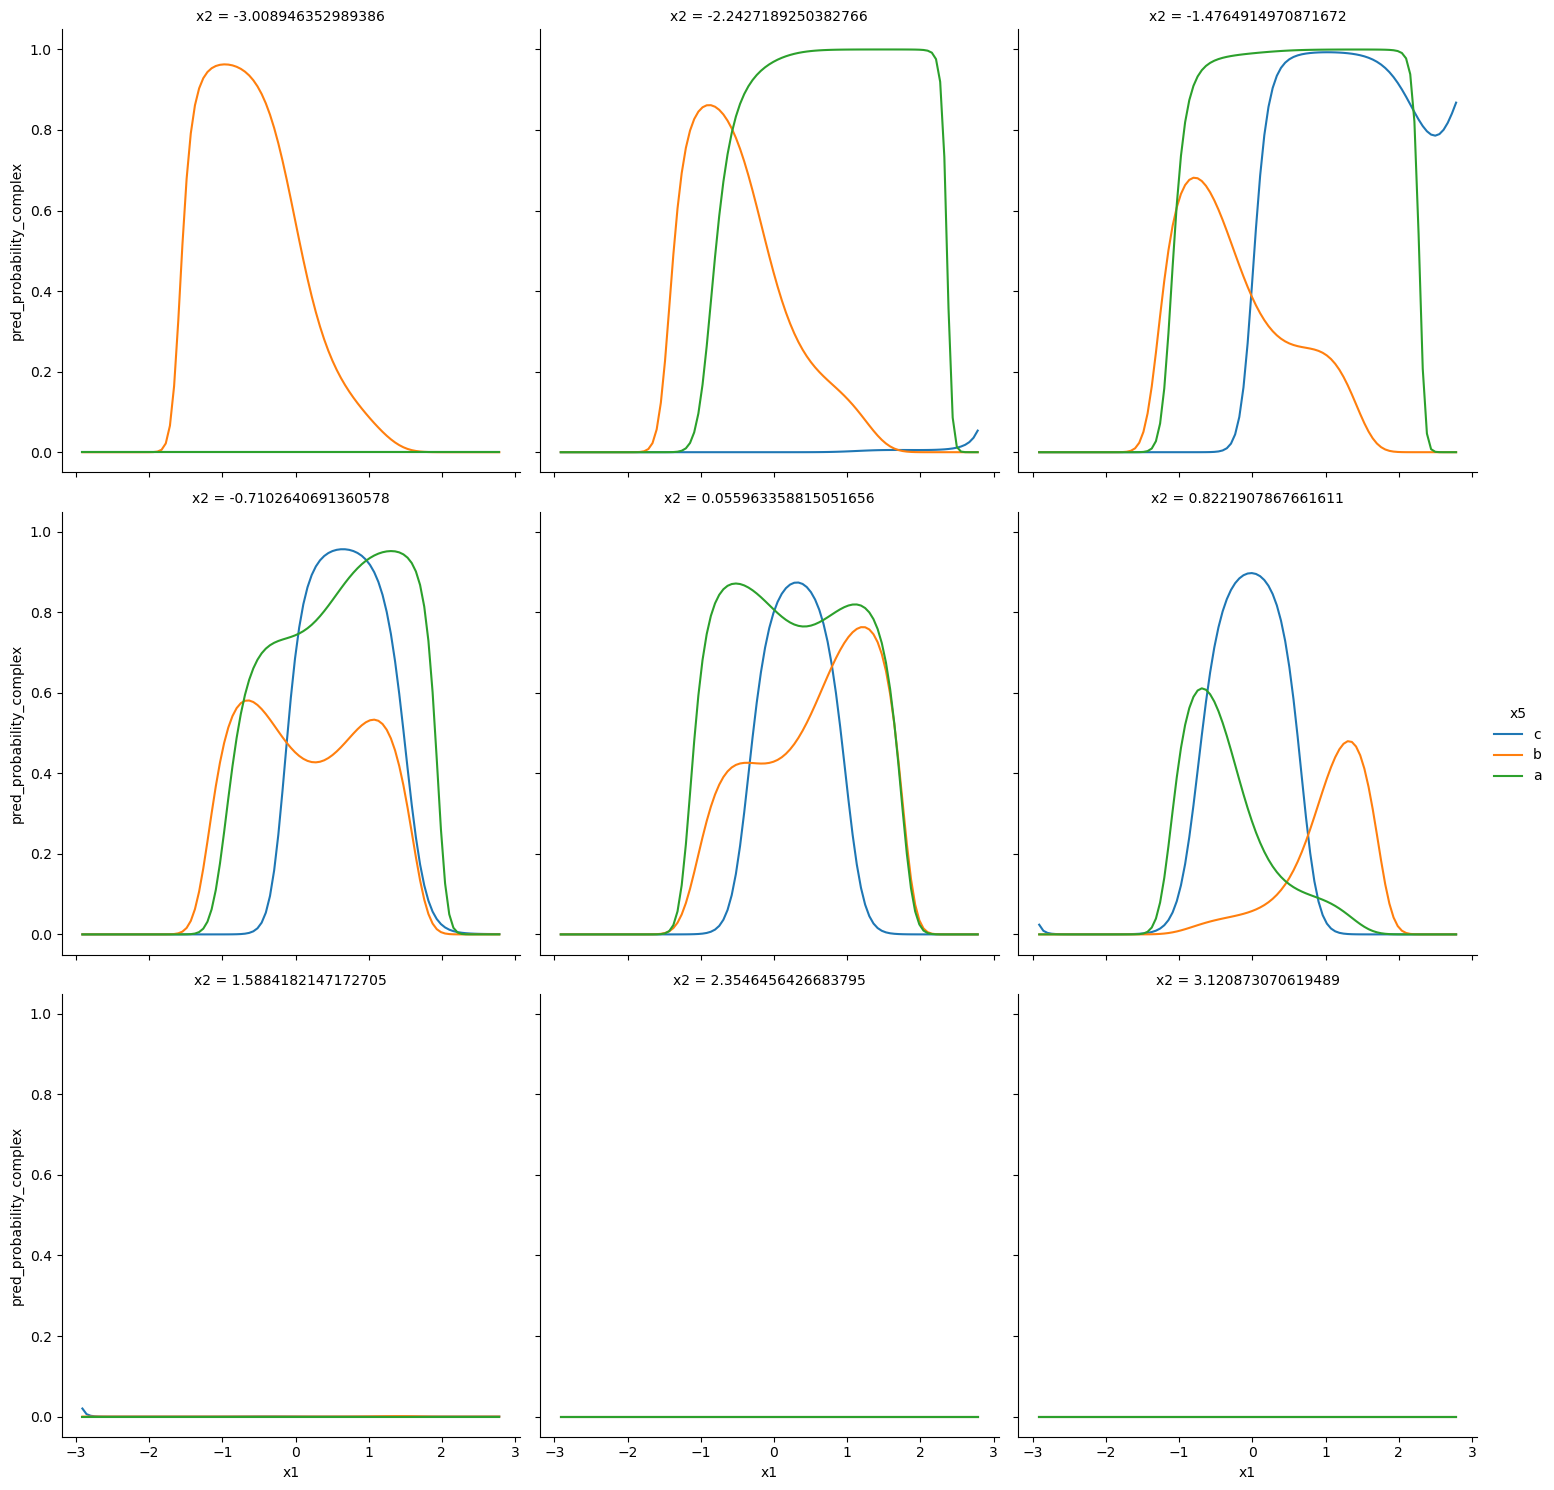

In [76]:
sns.relplot(data = dfviz, x='x1', y='pred_probability_complex', hue='x5', col='x2',
            kind='line', estimator=None, units='x5',
            col_wrap=3)

plt.show()